In [1]:
import numpy as np
X=np.load('X_small_train.npy').astype(np.float32)
X.shape

(1960, 100, 100, 3)

In [2]:
Y_x=np.load('Y_small_train.npy')
Y_0=np.where(Y_x==0)[0]
Y_1=np.where(Y_x==1)[0]
Y_2=np.where(Y_x==2)[0]
Y_3=np.where(Y_x==3)[0]
Y_4=np.where(Y_x==4)[0]
Y_5=np.where(Y_x==5)[0]
Y_6=np.where(Y_x==6)[0]
Y_7=np.where(Y_x==7)[0]
Y_8=np.where(Y_x==8)[0]
Y_9=np.where(Y_x>=9)[0]

In [7]:
choices0=np.random.choice(Y_0.shape, 300)
X_0=X[choices0]

In [8]:
X_0.shape

(300, 100, 100, 3)

In [9]:
XX=np.concatenate((X_0, X[Y_1], X[Y_2], X[Y_3], X[Y_4], X[Y_5], X[Y_6], X[Y_7], X[Y_8], X[Y_9]), axis=0)

(840, 100, 100, 3)

In [12]:
len(Y_1)

237

In [13]:
YY=np.zeros((XX.shape[0], 10))
YY[0:300, 0]=1
YY[300:300+len(Y_1), 1]=1
YY[300+len(Y_1):300+len(Y_1)+len(Y_2), 2]=1
YY[300+len(Y_1)+len(Y_2):300+len(Y_1)+len(Y_2)+len(Y_3), 3]=1
YY[300+len(Y_1)+len(Y_2)+len(Y_3):300+len(Y_1)+len(Y_2)+len(Y_3)+len(Y_4), 4]=1
YY[300+len(Y_1)+len(Y_2)+len(Y_3)+len(Y_4):300+len(Y_1)+len(Y_2)+len(Y_3)+len(Y_4)+len(Y_5), 5]=1
YY[300+len(Y_1)+len(Y_2)+len(Y_3)+len(Y_4)+len(Y_5):300+len(Y_1)+len(Y_2)+len(Y_3)+len(Y_4)+len(Y_5)+len(Y_6), 6]=1
YY[300+len(Y_1)+len(Y_2)+len(Y_3)+len(Y_4)+len(Y_5)+len(Y_6):300+len(Y_1)+len(Y_2)+len(Y_3)+len(Y_4)+len(Y_5)+len(Y_6)+len(Y_7), 7]=1
YY[300+len(Y_1)+len(Y_2)+len(Y_3)+len(Y_4)+len(Y_5)+len(Y_6)+len(Y_7):300+len(Y_1)+len(Y_2)+len(Y_3)+len(Y_4)+len(Y_5)+len(Y_6)+len(Y_7)+len(Y_8), 8]=1
YY[300+len(Y_1)+len(Y_2)+len(Y_3)+len(Y_4)+len(Y_5)+len(Y_6)+len(Y_7)+len(Y_8):300+len(Y_1)+len(Y_2)+len(Y_3)+len(Y_4)+len(Y_5)+len(Y_6)+len(Y_7)+len(Y_8)+len(Y_9), 9]=1

In [16]:
import matplotlib.pyplot as plt

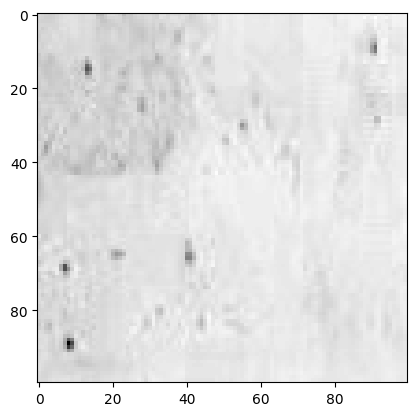

In [28]:
XX1=np.zeros((840, 3, 100, 100)).astype(np.float32)
for i in range(XX.shape[0]):
    temp =np.zeros((3,100,100))
    temp[0]=XX[i, :, :, 0]
    temp[1]=XX[i, :, :, 1]
    temp[2]=XX[i, :, :, 2]
    XX1[i]=temp
plt.imshow(XX1[0,0],cmap='gray')

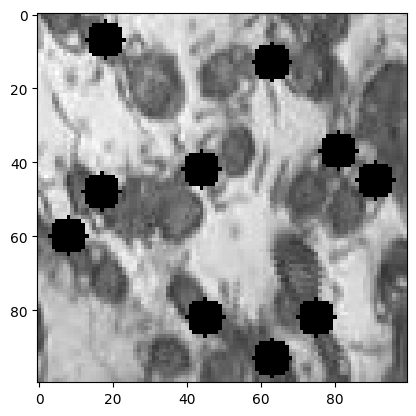

In [29]:
plt.imshow(XX1[-1,0],cmap='gray')

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

net = nn.Sequential(
    nn.Conv2d(3, 20, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(20, 40, kernel_size=7), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=4, stride=4),
    nn.Conv2d(40, 80, kernel_size=11), nn.Sigmoid(),
    #nn.AvgPool2d(kernel_size=8, stride=8),
    nn.Flatten(),
    nn.Linear(80, 40), nn.ReLU(),
    nn.Linear(40, 20),  nn.ReLU(),
    nn.Linear(20, 10), nn.Softmax(dim=1)
    )

# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(3, 20, kernel_size=5, padding=2)
#         self.pool1 = nn.MaxPool2d(kernel_size=5, stride=5)
#         self.conv2 = nn.Conv2d(20, 40, kernel_size=7)
#         self.pool2 = nn.MaxPool2d(kernel_size=7, stride=7)
#         self.conv3 = nn.Conv2d(40, 80, kernel_size=11)
#         self.pool3 = nn.MaxPool2d(kernel_size=11, stride=11)
#         self.fc1 = nn.Linear(160, 80)
#         self.fc2 = nn.Linear(80, 1)

#     def forward(self, x):
#         x = self.pool1(F.relu(self.conv1(x)))
#         x = self.pool2(F.relu(self.conv2(x)))
#         x = self.pool3(F.relu(self.conv3(x)))
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x


# net = Net()

In [19]:
net

Sequential(
  (0): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(20, 40, kernel_size=(7, 7), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=4, stride=4, padding=0)
  (6): Conv2d(40, 80, kernel_size=(11, 11), stride=(1, 1))
  (7): Sigmoid()
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=80, out_features=40, bias=True)
  (10): ReLU()
  (11): Linear(in_features=40, out_features=20, bias=True)
  (12): ReLU()
  (13): Linear(in_features=20, out_features=10, bias=True)
  (14): Softmax(dim=1)
)

In [20]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range
 
 
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    print(mu,sigma)
    return (data - mu) / sigma

In [22]:
XX_temp = torch.from_numpy(XX1)
for layer in net:
    XX_temp = layer(XX_temp)
    print(layer.__class__.__name__,'output shape: \t',XX_temp.shape)

Conv2d output shape: 	 torch.Size([1120, 20, 100, 100])
Sigmoid output shape: 	 torch.Size([1120, 20, 100, 100])
AvgPool2d output shape: 	 torch.Size([1120, 20, 50, 50])
Conv2d output shape: 	 torch.Size([1120, 40, 44, 44])
Sigmoid output shape: 	 torch.Size([1120, 40, 44, 44])
AvgPool2d output shape: 	 torch.Size([1120, 40, 11, 11])
Conv2d output shape: 	 torch.Size([1120, 80, 1, 1])
Sigmoid output shape: 	 torch.Size([1120, 80, 1, 1])
Flatten output shape: 	 torch.Size([1120, 80])
Linear output shape: 	 torch.Size([1120, 40])
ReLU output shape: 	 torch.Size([1120, 40])
Linear output shape: 	 torch.Size([1120, 20])
ReLU output shape: 	 torch.Size([1120, 20])
Linear output shape: 	 torch.Size([1120, 10])
Softmax output shape: 	 torch.Size([1120, 10])


In [9]:
mean=98.58095238095238
sigma=7.194284705674627

In [23]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [24]:
XX=torch.from_numpy(XX)

In [20]:
choices=np.random.choice(1960,1960)
Y=torch.from_numpy(Y)
XX_train=XX[choices]
YY_train=Y[choices]

In [34]:
XX1=torch.from_numpy(XX1)
YY=torch.from_numpy(YY)

In [43]:
outputs

tensor([[-0.1167,  0.1990, -0.0028,  ..., -0.1373,  0.0545, -0.0512],
        [-0.1165,  0.1992, -0.0026,  ..., -0.1372,  0.0543, -0.0513],
        [-0.1165,  0.1991, -0.0027,  ..., -0.1371,  0.0541, -0.0513],
        ...,
        [-0.1165,  0.1991, -0.0028,  ..., -0.1371,  0.0541, -0.0513],
        [-0.1162,  0.1989, -0.0022,  ..., -0.1370,  0.0539, -0.0513],
        [-0.1165,  0.1991, -0.0027,  ..., -0.1372,  0.0542, -0.0513]],
       grad_fn=<AddmmBackward0>)

In [36]:
outputs[0]

tensor([0.0833, 0.0895, 0.1333, 0.0839, 0.0944, 0.1223, 0.1028, 0.0936, 0.1059,
        0.0911], grad_fn=<SelectBackward0>)

In [37]:
labels[0]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64)

In [27]:
outputs = net(XX)
outputs

tensor([[-0.1165,  0.1991, -0.0027,  ..., -0.1372,  0.0542, -0.0513],
        [-0.1165,  0.1991, -0.0027,  ..., -0.1372,  0.0542, -0.0513],
        [-0.1165,  0.1991, -0.0027,  ..., -0.1372,  0.0542, -0.0513],
        ...,
        [-0.1166,  0.1991, -0.0027,  ..., -0.1371,  0.0542, -0.0512],
        [-0.1166,  0.1990, -0.0027,  ..., -0.1370,  0.0541, -0.0512],
        [-0.1166,  0.1993, -0.0028,  ..., -0.1372,  0.0542, -0.0512]],
       grad_fn=<AddmmBackward0>)

In [33]:
Y_pred=outputs.detach().numpy()
Yp=np.argmax(Y_pred,axis=1)

In [39]:
Yp=np.argmax(Y_pred,axis=1)
Yp

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
Yp.shape

(1960,)

In [34]:
for i in range(10):
    print(len(Yp[Yp==i]))

0
0
0
0
0
0
0
0
0
0
